# Random Forest

In [1]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('./dataset/train_data.csv')
test = pd.read_csv('./dataset/test_data.csv')

In [4]:
X_train = train.drop(['op10_test', 'op10_time_series', 'op20_test', 'op20_time_series',
                            'op30_test', 'op30_time_series', 'op40_test', 'op40_time_series', 
                            'op50_test', 'op50_time_series', 'op60_test', 
                            'op40_length', 'op40_width', 'op40_height', 
                            'op40_light_sensor', 'op40_temperature', 'op40_scratch', 'op40_operator', 
                            'op50_length', 'op50_width', 'op50_height',
                            'op50_light_sensor', 'op50_temperature', 'op50_scratch', 'op50_operator',
                            'op60_length', 'op60_width', 'op60_height', 
                            'op60_light_sensor', 'op60_scratch', 'uniform_distribution'], axis = 1) # train data에서 op 10 ~ 30의 NaN 값, op 40 ~ 60의 불필요한 칼럼을 drop으로 삭제
X_train.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,...,op20_light_sensor,op20_scratch,op20_operator,op30_length,op30_width,op30_height,op30_electricity_sensor,op30_light_sensor,op30_scratch,op30_operator
0,199.996,100.002,50.001,100.000,49.997,59.997,30.000,50.003,29.996,30.000,...,0,1,1,199.995873,180.106820,59.996905,94.711471,0,1,1
1,200.002,100.000,49.998,99.999,50.002,60.000,29.999,49.994,29.999,30.007,...,0,1,1,200.001735,179.993792,59.999933,94.880748,0,1,1
2,199.998,100.000,49.998,100.003,50.003,59.998,29.995,50.002,30.000,30.003,...,0,1,1,199.997595,180.007309,59.997682,92.783317,0,1,1
3,200.002,100.000,50.000,100.000,50.003,60.000,30.001,49.995,29.998,30.002,...,0,1,1,200.001981,179.995833,60.000453,93.951689,0,1,1
4,200.001,100.001,49.999,100.003,49.997,59.996,30.000,50.001,29.996,30.002,...,0,1,1,200.001256,180.005777,59.995941,90.609768,0,1,1


In [5]:
Y_train = train['op60_test'] # train data에서 op60_test를 라벨 값으로 사용
Y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: op60_test, dtype: int64

In [6]:
X_test = test.drop(['op10_test', 'op10_time_series', 'op20_test', 'op20_time_series',
                            'op30_test', 'op30_time_series', 'op40_test', 'op40_time_series', 
                            'op50_test', 'op50_time_series', 'op60_test', 
                            'op40_length', 'op40_width', 'op40_height', 
                            'op40_light_sensor', 'op40_temperature', 'op40_scratch', 'op40_operator', 
                            'op50_length', 'op50_width', 'op50_height',
                            'op50_light_sensor', 'op50_temperature', 'op50_scratch', 'op50_operator',
                            'op60_length', 'op60_width', 'op60_height', 
                            'op60_light_sensor', 'op60_scratch', 'uniform_distribution'], axis = 1) #test data에서 op 10 ~ 30의 NaN 값, op 40 ~ 60의 불필요한 칼럼을 drop으로 삭제
X_test.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,...,op20_light_sensor,op20_scratch,op20_operator,op30_length,op30_width,op30_height,op30_electricity_sensor,op30_light_sensor,op30_scratch,op30_operator
0,199.997,99.999,50.003,100.000,50.005,60.003,29.996,50.004,30.002,29.998,...,0,1,3,199.997061,180.005558,60.002786,95.000563,0,1,3
1,199.999,100.001,50.002,99.996,50.000,60.004,29.998,50.004,29.995,30.000,...,0,1,3,199.999360,180.005180,60.003705,91.815773,0,1,3
2,199.999,100.001,50.002,100.001,50.001,60.003,29.997,50.001,30.003,30.001,...,0,1,3,199.999315,180.004519,60.002609,94.368763,0,1,3
3,200.002,99.996,49.999,100.001,49.998,60.000,30.000,50.006,30.001,30.001,...,0,1,3,200.002048,180.001510,59.999508,96.679591,0,1,3
4,199.999,100.003,50.003,100.000,50.001,60.000,30.000,49.998,30.002,30.001,...,0,1,3,199.999422,180.001309,59.999977,94.037526,0,1,3


In [7]:
Y_test = test['op60_test'] # test data에서 op60_test 칼럼을 test label 값으로 사용
Y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: op60_test, dtype: int64

In [8]:
rf_clf = RandomForestClassifier(random_state=0)    # RandomForest classifier 클래스를 통해 분류
rf_clf.fit(X_train , Y_train)    # train 값 학습
pred = rf_clf.predict(X_test)   # 학습을 토대로 test 값 평가
accuracy = accuracy_score(Y_test , pred)    # 정확도 측정
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9810


In [9]:
from sklearn.model_selection import GridSearchCV # GridSearchCV를 활용한 하이퍼 파라미터 튜닝

params = {
    'n_estimators':[300],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
} # max_depth, min_samples_leaf, min_samples_split를 리스트로 설정 하여 학습을 했을 시 리스트 내에서 최적의 하이퍼 파라미터를 찾는다                           

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , Y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고 예측 정확도: 0.9764


In [10]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , Y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(Y_test , pred)))

예측 정확도: 0.9810


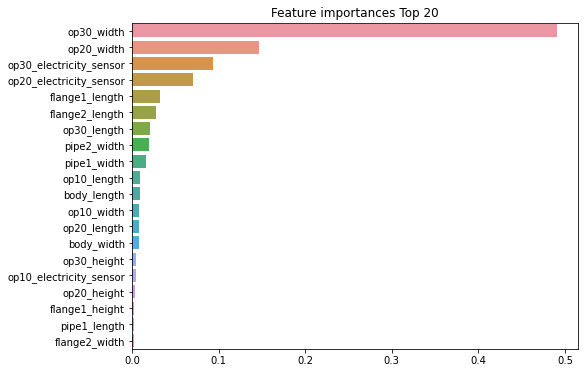

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_ # 각 칼럼별 정확도에 영향을 미치는 정도 확인
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20] # 상위 20개만 추출

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20 , y = ftr_top20.index)
plt.show()